<a href="https://colab.research.google.com/github/VISHWAJITT123/CVG-FILES/blob/master/vanillaEncoder_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


In [10]:
def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 784))
    return X

X_train  =  pre_process(X_train)
X_test  =  pre_process(X_test)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


In [11]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

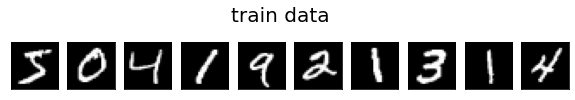

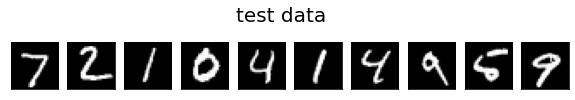

In [12]:
show_data(X_train, title="train data")
show_data(X_test, title="test data")

In [13]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [14]:
#encoder
input_layer = Input(shape=(input_dim,), name="INPUT")
hidden_layer_1 = Dense(hidden_dim, activation='relu', name="HIDDEN_1")(input_layer)

# code
code_layer = Dense(encode_dim, activation='relu', name="CODE")(hidden_layer_1)

# decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name="HIDDEN_2")(code_layer)
output_layer = Dense(output_dim, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

In [15]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='binary_crossentropy')
AE.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
CODE (Dense)                 (None, 100)               25700     
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 256)               25856     
_________________________________________________________________
OUTPUT (Dense)               (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [26]:
AE.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661
E

In [27]:
decoded_data = AE.predict(X_test)

In [28]:
get_encoded_data = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

In [29]:
encoded_data = get_encoded_data.predict(X_test)

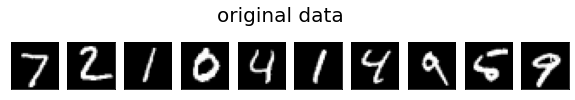

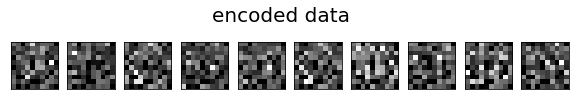

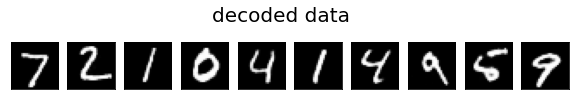

In [30]:
show_data(X_test, title="original data")
show_data(encoded_data, height=10, width=10, title="encoded data")
show_data(decoded_data, title="decoded data")